In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, root_mean_squared_error
import yfinance as yf
import seaborn as sns
import matplotlib.dates as mdates
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings("ignore")

Import IHSG Data

In [16]:
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

pd.set_option('display.max_rows', None)
df = yf.Ticker("DFAM.JK")
df = df.history(start=start_date, end=end_date)
del df["Dividends"]
del df["Stock Splits"]
forecastData = df.copy()
df.tail(50)

,Open,High,Low,Close,Volume
Date,,,,,
2025-10-24 00:00:00+07:00,79.0,82.0,78.0,79.0,2529100
2025-10-27 00:00:00+07:00,80.0,80.0,72.0,74.0,11165800
2025-10-28 00:00:00+07:00,75.0,78.0,72.0,74.0,10174600
2025-10-29 00:00:00+07:00,75.0,75.0,72.0,74.0,2704200
2025-10-30 00:00:00+07:00,74.0,85.0,73.0,75.0,16324500
2025-10-31 00:00:00+07:00,75.0,77.0,74.0,74.0,1350900
2025-11-03 00:00:00+07:00,74.0,75.0,73.0,74.0,760700
2025-11-04 00:00:00+07:00,75.0,76.0,72.0,73.0,3443000
2025-11-05 00:00:00+07:00,73.0,90.0,72.0,73.0,70873400


Close Price Visualitation

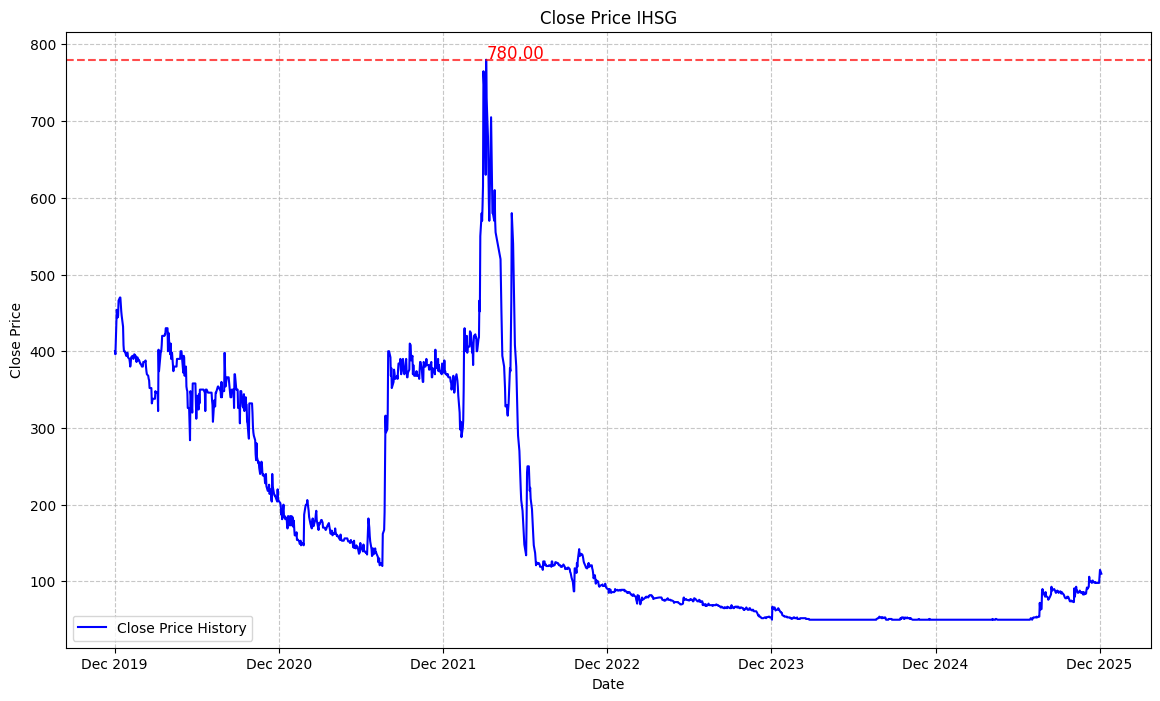

In [3]:
# Close price visualitation

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x=df.index, y='Close', label='Close Price History', color='blue')

max_price = df['Close'].max()
max_price_date = df['Close'].idxmax()

# Annotate the hight price
plt.annotate(f'{max_price:.2f}',
             xy=(max_price_date, max_price),
             xytext=(max_price_date, max_price + 2),
             fontsize=12, color='red')

plt.axhline(max_price, linestyle='--', color='red', alpha=0.7)
plt.title('Close Price IHSG')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Preprocessing

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
scaled_data

array([[0.47945205],
       [0.4739726 ],
       [0.55342466],
       ...,
       [0.06575342],
       [0.0890411 ],
       [0.08219178]])

In [5]:
def create_sequences(df, sequence_length):
    sequences = []
    labels = []
    for i in range(len(df) - sequence_length):
        sequences.append(df[i:i + sequence_length])
        labels.append(df[i + sequence_length, 0])
    return np.array(sequences), np.array(labels)

In [6]:
sequence_length = 30

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [7]:
X_train

array([[[0.47945205],
        [0.4739726 ],
        [0.55342466],
        ...,
        [0.47123288],
        [0.46849315],
        [0.46575342]],

       [[0.4739726 ],
        [0.55342466],
        [0.54794521],
        ...,
        [0.46849315],
        [0.46575342],
        [0.46849315]],

       [[0.55342466],
        [0.54794521],
        [0.53972603],
        ...,
        [0.46575342],
        [0.46849315],
        [0.4739726 ]],

       ...,

       [[0.00547945],
        [0.00410959],
        [0.00410959],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.00410959],
        [0.00410959],
        [0.00273973],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.00410959],
        [0.00273973],
        [0.00410959],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

Training Data

In [8]:
model = Sequential()

# First Layer lSTM
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Second Layer LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Dense Layer
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

2026-01-06 13:17:38.161844: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2026-01-06 13:17:38.161872: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-01-06 13:17:38.161878: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2026-01-06 13:17:38.161902: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-06 13:17:38.161915: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
import tensorflow as tf

callbacks = (
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
)

history = model.fit(X_train, y_train, epochs=100, batch_size=126, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100


2026-01-06 13:17:40.112727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 6s 115ms/step - loss: 0.0216 - val_loss: 0.0031
Epoch 2/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0067 - val_loss: 8.1113e-05
Epoch 3/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0041 - val_loss: 1.5038e-04
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0037 - val_loss: 7.2687e-05
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0033 - val_loss: 7.4324e-05
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0031 - val_loss: 5.4438e-05
Epoch 7/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0032 - val_loss: 5.3101e-05
Epoch 8/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0029 - val_loss: 6.3291e-05
Epoch 9/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0030 - val_loss: 4.9918e-05
Epoch 10/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0033 - val_loss: 1.297

Model Evaluation

In [10]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
mse = mean_squared_error(y_test_scaled, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, predictions)
mape = mean_absolute_percentage_error(y_test_scaled, predictions) * 100

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")

9/9 [==============================] - 1s 48ms/step
Mean Squared Error: 15.497384788481861
Root Mean Squared Error: 3.9366717908001756
R2 Score: 0.9534998017371318
Mean Absolute Percentage Error: 2.4158383695791796%


Prediction Future IHSG Price in 1 Month

In [11]:
# we choose last 30 days or data ke belakang which the reasons use (-) in sequence_length
last_30_days = df['Close'][-sequence_length:].values.reshape(-1, 1)
last_30_days_scaled = scaler.transform(last_30_days)

X_predict = []
X_predict.append(last_30_days_scaled)

X_predict = np.array(X_predict)
X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))
predicted_price = model.predict(X_predict)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted IHSG Price: {predicted_price[0][0]}")

1/1 [==============================] - 1s 539ms/step
Predicted IHSG Price: 104.69549560546875


In [12]:
future_days = 30

last_30_days = df['Close'][-sequence_length:].values.reshape(-1, 1)
last_30_days_scaled = scaler.transform(last_30_days)
future_predictions = []

for i in range(future_days):
    X_predict = []
    X_predict.append(last_30_days_scaled)
    X_predict = np.array(X_predict)
    X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

    predicted_price = model.predict(X_predict)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)

    future_predictions.append(predicted_price_unscaled[0, 0])

    new_scaled_data = np.append(last_30_days_scaled[1:], predicted_price, axis=0)
    last_30_days_scaled = new_scaled_data.reshape(-1, 1)

last_historical_date = df.index[-1].tz_localize(None).normalize()

future_dates_all = pd.date_range(
    start = last_historical_date,
    periods = future_days * 2,
    freq = 'B'
)


future_dates = future_dates_all[future_dates_all > last_historical_date][:future_days]

future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price IHSG': future_predictions})

1/1 [==============================] - 0s 9ms/step


Visualitation IHSG Predictions

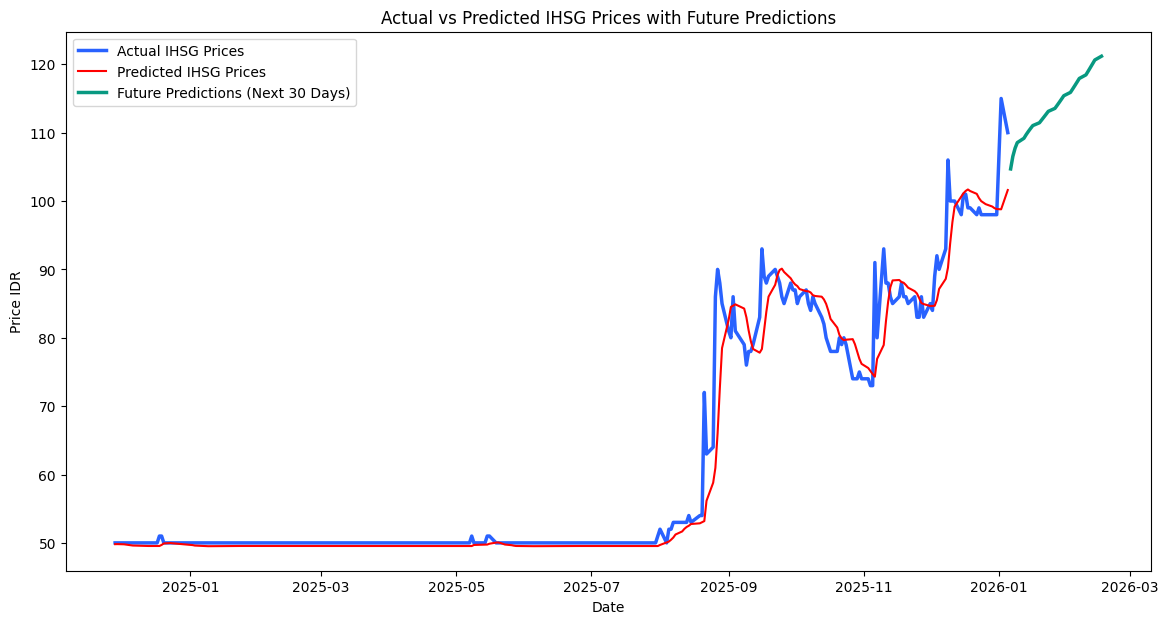

In [13]:
plt.figure(figsize=(14, 7))

plt.plot(df.index[-len(y_test_scaled):], y_test_scaled, label='Actual IHSG Prices', color='#2962ff', linewidth=2.5)
plt.plot(df.index[-len(y_test_scaled):], predictions, label='Predicted IHSG Prices', color='red', linewidth=1.5)
plt.plot(future_dates, future_predictions, label='Future Predictions (Next 30 Days)', color='#089981', linewidth=2.5)

plt.title('Actual vs Predicted IHSG Prices with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price IDR')
plt.legend()
plt.show()

In [14]:
# Transforming into DataFrame with pandas
future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price IHSG': future_predictions
})

future_predictions_df.head(15)

,Date,Predicted Price IHSG
0,2026-01-06,104.695496
1,2026-01-07,106.540466
2,2026-01-08,107.718231
3,2026-01-09,108.542274
4,2026-01-12,109.175453
5,2026-01-13,109.703278
6,2026-01-14,110.174065
7,2026-01-15,110.611870
8,2026-01-16,111.032990
9,2026-01-19,111.445091


In [15]:
# calculate percentage change from the last actual close price
last_actual_price = df['Close'].iloc[-1]
percentage_change = ((future_predictions_df['Predicted Price IHSG'].iloc[-1] - last_actual_price) / last_actual_price) * 100

# Determine profit or loss
status = "profit" if percentage_change > 0 else "loss"

# print the percentage prediction
print(f"Percentage prediction for 30 days is: {status} {abs(percentage_change):.2f}%")

Percentage prediction for 30 days is: profit 10.16%
